In [31]:
import numpy as np
import networkx as nx
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
def get_size(G, V_, N, u):
    
    V = V_.copy()
    
    ans = 1;  V[u] = 1
    Q = deque([]); Q.append(u)
    while Q:
        u = Q.popleft()
        for v in G.predecessors(u):
            if not V[v]:
                ans += 1; V[v] = 1
                Q.append(v)
    
    return ans

def visit(G, V, u):
    V[u] = 1; ans = 1
    Q = deque([]); Q.append(u)
    while Q:
        u = Q.popleft(); ans += 1
        for v in G.predecessors(u):
            if not V[v]:
                V[v] = 1
                Q.append(v)
    
    return V, ans

In [3]:
def greedyApp(G, N, K, limit):
    
    E = []
    V = [0 for u in range(N)]
    for u in range(N):
        E.append((get_size(G, V, N, u), u))

    S = set()
    for e in E:
        if e[0] < limit:
            S.add(e[1])

    ans = []
    count = 0
    while count < K:
        maxv = 0; u = -1
        for v in S:
            s = get_size(G, V, N, v)
            if s > maxv:
                u = v
                maxv = s

        V, _ = visit(G, V, u)
        ans.append(u)
        S.remove(u)
        count += 1

    return ans

In [4]:
path = 'data/graph_geom_corrected_cycles.csv'
csv_grafo = pd.read_csv(path, sep=';')
csv_grafo.head()

,self,other,geometry,edge,edge_correction
0,16381,16389,"LINESTRING (130212.8925999999 5915000.2917, 13...",14981,NaN
1,16360,16372,"LINESTRING (130370.3520999998 5914890.4633, 13...",14294,NaN
2,16285,16396,"LINESTRING (130354.9173999997 5915020.9389, 13...",14295,NaN
3,16395,14079,"LINESTRING (130289.5086000003 5915158.0352, 13...",14605,NaN
4,16410,16427,"LINESTRING (130513.2147000004 5915006.1425, 13...",14857,NaN


In [5]:
G = nx.DiGraph()

S = set()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    S.add(origin)
    S.add(dest)

S = list(S)
id_ = {}; l = 0
for u in S:
    id_[u] = l
    l += 1

G = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    G.add_edge(id_[origin], id_[dest])
for node in G.nodes:
    G.nodes[node]['weight'] = 100
    
N = l

In [6]:
V = [0 for u in range(N)]

S = []

for u in range(N):
    S.append(get_size(G, V, N, u))

S.sort()
    
print(S)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [7]:
r = 50

CV = [0 for u in range(N)]

CV[r] = 1
Q = deque([]); Q.append(r)
while Q:
    u = Q.popleft()
    for v in G.successors(u):
        if not CV[v]:
            CV[v] = 1
            Q.append(v)

In [8]:
def greedyAppNew(G, V_, N, K, limit):
    
    V = V_.copy()
    
    E = []
    for u in range(N):
        if not V[u]:
            E.append((get_size(G, V, N, u), u))

    S = set()
    for e in E:
        if e[0] > 0 and e[0] <= limit:
            S.add(e[1])

    ans = []
    count = 0
    while count < K:
        maxv = 0; u = -1
        for v in S:
            s = get_size(G, V, N, v)
            if s > maxv:
                u = v
                maxv = s
        if u == -1:
            break

        V, _ = visit(G, V, u)
        ans.append(u)
        S.remove(u)
        count += 1

    return ans

In [10]:
def add_visit(G, N, V, u):
    
    V_ = [0 for u in range(N)]
    
    V[u] += 1
    Q = deque([]); Q.append(u)
    while Q:
        u = Q.popleft()
        for v in G.predecessors(u):
            if not V_[v]:
                V[v] += 1
                V_[v] = 1
                Q.append(v)
                
def deactivate(G, V, u):
    V[u] = 1
    Q = deque([]); Q.append(u)
    while Q:
        u = Q.popleft()
        for v in G.predecessors(u):
            if not V[v]:
                V[v] = 1
                Q.append(v)

T = []
for r in range(N):
    CV = [0 for u in range(N)]

    CV[r] = 1
    Q = deque([]); Q.append(r)
    while Q:
        u = Q.popleft()
        for v in G.successors(u):
            if not CV[v]:
                CV[v] = 1
                Q.append(v)
    V = [0 for u in range(N)]

    R = N
    for t in range(100):
        P = greedyAppNew(G, V, N, 10, R / 2)
        if sum([CV[p] for p in P]) > 0:
            V = [0 for u in range(N)]
            for p in P:
                if CV[p]:
                    add_visit(G, N, V, p)
            for u in range(N):
                if V[u] == sum([CV[p] for p in P]):
                    V[u] = 0
                else:
                    V[u] = 1
        for p in P:
            if not V[p] and not CV[p]:
                deactivate(G, V, p)

        R = sum([1 - V[u] for u in range(N)])

        if R == 1:
            for u in range(N):
                if not V[u]:
                    print(u, t + 1)
                    T.append(t + 1)
            break
        if t == 99:
            print(r, "*******************")
            T.append(100)
    

0 3
1 5
2 2
3 6
4 8
5 10
6 5
7 3
8 5
9 6
10 4
11 8
12 7
13 4
14 2
15 2
16 5
17 2
18 5
19 5
20 2
21 3
22 4
23 5
24 4
25 3
26 5
27 9
28 3
29 5
30 5
31 5
32 5
33 5
34 4
35 5
36 3
37 5
38 5
39 6
40 8
41 7
42 6
43 8
44 4
45 4
46 4
47 4
48 4
49 3
50 6
51 4
52 8
53 4
54 6
55 6
56 5
57 6
58 4
59 4
60 6
61 7
62 8
63 6
64 6
65 9
66 12
67 4
68 4
69 4
70 4
71 4
72 10
73 4
74 12
75 13
76 8
77 7
78 5
79 5
80 12
81 7
82 5
83 5
84 8
85 5
86 9
87 5
88 3
89 3
90 3
91 3
92 5
93 4
94 4
95 5
96 4
97 4
98 6
99 5
100 5
101 5
102 3
103 3
104 5
105 3
106 6
107 10
108 12
109 7
110 6
111 12
112 7
113 13
114 8
115 13
116 8
117 8
118 14
119 5
120 4
121 3
122 4
123 6
124 4
125 6
126 4
127 5
128 5
129 4
130 4
131 4
132 4
133 8
134 6
135 7
136 3
137 3
138 3
139 3
140 3
141 3
142 3
143 5
144 10
145 3
146 3
147 3
148 9
149 5
150 4
151 4
152 4
153 3
154 12
155 4
156 4
157 3
158 3
159 5
160 6
161 7
162 7
163 5
164 6
165 5
166 4
167 7
168 10
169 8
170 5
171 5
172 10
173 7
174 8
175 14
176 3
177 6
178 6
179 6
180 6
181 6
1

1311 6
1312 4
1313 4
1314 4
1315 4
1316 7
1317 5
1318 9
1319 6
1320 6
1321 9
1322 14
1323 13
1324 7
1325 13
1326 6
1327 7
1328 7
1329 7
1330 12
1331 5
1332 11
1333 17
1334 16
1335 6
1336 7
1337 5
1338 6
1339 6
1340 6
1341 6
1342 6
1343 3
1344 3
1345 3
1346 4
1347 6
1348 3
1349 3
1350 3
1351 4
1352 4
1353 4
1354 8
1355 6
1356 4
1357 4
1358 4
1359 5
1360 5
1361 5
1362 7
1363 4
1364 9
1365 6
1366 5
1367 5
1368 8
1369 7
1370 7
1371 10
1372 6
1373 8
1374 6
1375 5
1376 5
1377 5
1378 5
1379 5
1380 5
1381 5
1382 5
1383 8
1384 10
1385 5
1386 5
1387 7
1388 5
1389 5
1390 6
1391 5
1392 7
1393 5
1394 10
1395 5
1396 8
1397 5
1398 6
1399 6
1400 9
1401 8
1402 11
1403 9
1404 7
1405 6
1406 6
1407 9
1408 7
1409 7
1410 7
1411 5
1412 7
1413 4
1414 6
1415 6
1416 5
1417 6
1418 5
1419 5
1420 6
1421 6
1422 5
1423 7
1424 4
1425 4
1426 4
1427 4
1428 4
1429 4
1430 4
1431 4
1432 4
1433 5
1434 4
1435 4
1436 7
1437 5
1438 7
1439 6
1440 4
1441 4
1442 6
1443 11
1444 8
1445 10
1446 4
1447 8
1448 6
1449 4
1450 4
1451 4


2460 11
2461 18
2462 5
2463 4
2464 9
2465 7
2466 3
2467 7
2468 7
2469 11
2470 7
2471 7
2472 9
2473 7
2474 7
2475 7
2476 7
2477 13
2478 11
2479 12
2480 9
2481 7
2482 12
2483 8
2484 7
2485 10
2486 13
2487 8
2488 8
2489 8
2490 13
2491 13
2492 10
2493 13
2494 12
2495 4
2496 10
2497 12
2498 12
2499 8
2500 8
2501 8
2502 14
2503 11
2504 8
2505 8
2506 10
2507 10
2508 9
2509 13
2510 11
2511 10
2512 10
2513 10
2514 12
2515 9
2516 7
2517 8
2518 8
2519 4
2520 8
2521 12
2522 9
2523 11
2524 13
2525 14
2526 11
2527 9
2528 7
2529 3
2530 7
2531 7
2532 9
2533 10
2534 7
2535 7
2536 7
2537 8
2538 7
2539 12
2540 5
2541 7
2542 5
2543 7
2544 7
2545 4
2546 9
2547 13
2548 7
2549 7
2550 7
2551 9
2552 9
2553 8
2554 5
2555 10
2556 17
2557 9
2558 18
2559 9
2560 4
2561 11
2562 11
2563 7
2564 4
2565 4
2566 5
2567 12
2568 4
2569 10
2570 2
2571 5
2572 4
2573 4
2574 4
2575 4
2576 5
2577 4
2578 9
2579 13
2580 5
2581 4
2582 4
2583 6
2584 9
2585 13
2586 11
2587 7
2588 8
2589 10
2590 9
2591 9
2592 6
2593 6
2594 6
2595 12
2

3606 3
3607 5
3608 5
3609 7
3610 7
3611 6
3612 5
3613 6
3614 4
3615 5
3616 13
3617 9
3618 5
3619 5
3620 5
3621 13
3622 5
3623 5
3624 8
3625 9
3626 5
3627 5
3628 5
3629 5
3630 7
3631 8
3632 9
3633 9
3634 5
3635 9
3636 10
3637 6
3638 8
3639 6
3640 6
3641 5
3642 5
3643 5
3644 5
3645 8
3646 8
3647 9
3648 7
3649 5
3650 5
3651 6
3652 9
3653 7
3654 7
3655 9
3656 7
3657 12
3658 6
3659 5
3660 8
3661 5
3662 5
3663 8
3664 5
3665 3
3666 6
3667 8
3668 7
3669 7
3670 6
3671 12
3672 6
3673 11
3674 13
3675 9
3676 4
3677 10
3678 5
3679 9
3680 6
3681 10
3682 9
3683 4
3684 6
3685 7
3686 5
3687 8
3688 4
3689 6
3690 4
3691 7
3692 5
3693 4
3694 4
3695 4
3696 4
3697 6
3698 4
3699 4
3700 4
3701 4
3702 6
3703 8
3704 7
3705 17
3706 16
3707 5
3708 16
3709 9
3710 15
3711 14
3712 6
3713 8
3714 7
3715 10
3716 8
3717 5
3718 6
3719 11
3720 5
3721 5
3722 5
3723 8
3724 5
3725 3
3726 3
3727 3
3728 3
3729 3
3730 4
3731 4
3732 4
3733 4
3734 4
3735 4
3736 4
3737 4
3738 4
3739 6
3740 3
3741 7
3742 4
3743 7
3744 4
3745 7
3746

In [11]:
print(max(T), sum(T) / N)

20 6.282424505757115


In [12]:
for i in range(N):
    if T[i] == 20:
        print(i)

1981
3277


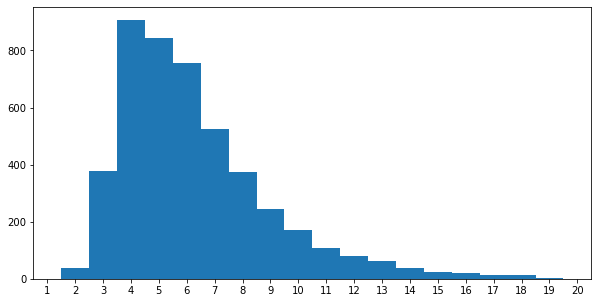

In [36]:
# with open('list_base.pkl', 'wb') as f:
#     pickle.dump(T, f)

with open('list_base.pkl', 'rb') as f:
    T = pickle.load(f)

bins = [b - 0.5 for b in range(1, 21)]

plt.figure(figsize=(10, 5))
plt.hist(T, bins=bins)
plt.xticks([b for b in range(1, 21)])
plt.xlim([0.5, 20.5])
plt.show()

In [38]:
T = []
for r in range(N):
    CV = [0 for u in range(N)]

    CV[r] = 1
    Q = deque([]); Q.append(r)
    while Q:
        u = Q.popleft()
        for v in G.successors(u):
            if not CV[v]:
                CV[v] = 1
                Q.append(v)
    V = [0 for u in range(N)]

    R = N; d = 5
    for t in range(100):
        P = greedyAppNew(G, V, N, 15, R / d)
        if sum([CV[p] for p in P]) > 0:
            V = [0 for u in range(N)]
            for p in P:
                if CV[p]:
                    add_visit(G, N, V, p)
            for u in range(N):
                if V[u] == sum([CV[p] for p in P]):
                    V[u] = 0
                else:
                    V[u] = 1
        for p in P:
            if not V[p] and not CV[p]:
                deactivate(G, V, p)

        R = sum([1 - V[u] for u in range(N)])

        if R == 1:
            for u in range(N):
                if not V[u]:
                    print(u, t + 1)
                    T.append(t + 1)
            break
        if R <= 20:
            d = 2
        if t == 99:
            print(r, "*******************")
            T.append(100)
    

0 3
1 5
2 3
3 8
4 6
5 8
6 4
7 3
8 3
9 5
10 3
11 8
12 6
13 3
14 2
15 5
16 6
17 2
18 5
19 7
20 2
21 2
22 3
23 3
24 2
25 2
26 4
27 8
28 3
29 7
30 4
31 4
32 4
33 4
34 3
35 4
36 2
37 4
38 4
39 4
40 4
41 6
42 6
43 5
44 3
45 3
46 3
47 3
48 4
49 2
50 5
51 3
52 7
53 3
54 5
55 9
56 4
57 5
58 3
59 3
60 5
61 7
62 12
63 13
64 7
65 10
66 12
67 3
68 3
69 3
70 3
71 3
72 5
73 3
74 6
75 12
76 7
77 7
78 11
79 5
80 12
81 7
82 11
83 6
84 4
85 9
86 10
87 6
88 2
89 3
90 3
91 3
92 5
93 4
94 5
95 3
96 5
97 3
98 3
99 3
100 3
101 6
102 3
103 3
104 3
105 3
106 6
107 6
108 3
109 12
110 4
111 4
112 4
113 4
114 12
115 8
116 5
117 6
118 6
119 6
120 3
121 5
122 6
123 7
124 3
125 5
126 4
127 3
128 6
129 4
130 3
131 3
132 4
133 8
134 6
135 6
136 6
137 6
138 3
139 3
140 3
141 3
142 3
143 5
144 11
145 3
146 3
147 3
148 6
149 6
150 6
151 9
152 5
153 3
154 11
155 3
156 4
157 3
158 3
159 4
160 4
161 7
162 15
163 5
164 6
165 3
166 3
167 5
168 8
169 6
170 3
171 3
172 6
173 6
174 8
175 6
176 4
177 4
178 4
179 4
180 4
181 4
182 

1318 5
1319 5
1320 7
1321 12
1322 18
1323 17
1324 10
1325 16
1326 10
1327 10
1328 10
1329 15
1330 9
1331 9
1332 9
1333 9
1334 9
1335 5
1336 6
1337 4
1338 4
1339 4
1340 4
1341 4
1342 5
1343 3
1344 3
1345 3
1346 4
1347 7
1348 3
1349 3
1350 3
1351 3
1352 3
1353 3
1354 5
1355 6
1356 3
1357 3
1358 3
1359 6
1360 6
1361 6
1362 8
1363 3
1364 10
1365 3
1366 3
1367 3
1368 6
1369 4
1370 4
1371 5
1372 4
1373 6
1374 4
1375 3
1376 4
1377 4
1378 4
1379 6
1380 7
1381 4
1382 4
1383 5
1384 7
1385 4
1386 4
1387 4
1388 5
1389 4
1390 7
1391 4
1392 4
1393 4
1394 7
1395 4
1396 4
1397 5
1398 5
1399 6
1400 9
1401 6
1402 8
1403 5
1404 6
1405 5
1406 7
1407 6
1408 7
1409 6
1410 4
1411 4
1412 7
1413 3
1414 7
1415 5
1416 4
1417 4
1418 3
1419 3
1420 3
1421 3
1422 3
1423 7
1424 3
1425 3
1426 4
1427 3
1428 3
1429 3
1430 3
1431 3
1432 3
1433 4
1434 3
1435 3
1436 6
1437 3
1438 3
1439 3
1440 3
1441 3
1442 9
1443 14
1444 11
1445 13
1446 7
1447 11
1448 6
1449 3
1450 3
1451 3
1452 3
1453 3
1454 4
1455 4
1456 4
1457 4
1458 7

2466 2
2467 4
2468 4
2469 5
2470 8
2471 3
2472 4
2473 9
2474 4
2475 4
2476 4
2477 10
2478 4
2479 5
2480 6
2481 11
2482 12
2483 8
2484 5
2485 6
2486 9
2487 4
2488 4
2489 4
2490 7
2491 4
2492 4
2493 4
2494 7
2495 3
2496 4
2497 4
2498 8
2499 4
2500 8
2501 4
2502 9
2503 11
2504 4
2505 4
2506 4
2507 4
2508 7
2509 5
2510 4
2511 4
2512 8
2513 4
2514 4
2515 4
2516 3
2517 4
2518 4
2519 4
2520 8
2521 5
2522 5
2523 7
2524 5
2525 5
2526 9
2527 4
2528 4
2529 3
2530 4
2531 4
2532 6
2533 7
2534 4
2535 4
2536 4
2537 4
2538 4
2539 7
2540 5
2541 7
2542 4
2543 4
2544 6
2545 3
2546 7
2547 12
2548 20
2549 7
2550 7
2551 7
2552 7
2553 5
2554 5
2555 9
2556 20
2557 7
2558 8
2559 7
2560 7
2561 7
2562 21
2563 4
2564 3
2565 3
2566 5
2567 11
2568 3
2569 5
2570 2
2571 6
2572 3
2573 9
2574 14
2575 13
2576 7
2577 6
2578 6
2579 6
2580 4
2581 3
2582 4
2583 5
2584 9
2585 9
2586 4
2587 4
2588 6
2589 8
2590 5
2591 4
2592 4
2593 4
2594 4
2595 7
2596 6
2597 5
2598 8
2599 4
2600 4
2601 4
2602 4
2603 5
2604 4
2605 3
2606 3
26

3618 4
3619 4
3620 4
3621 6
3622 3
3623 5
3624 7
3625 8
3626 4
3627 4
3628 6
3629 4
3630 6
3631 7
3632 7
3633 10
3634 9
3635 7
3636 6
3637 8
3638 7
3639 5
3640 6
3641 8
3642 4
3643 4
3644 4
3645 4
3646 7
3647 8
3648 6
3649 9
3650 6
3651 5
3652 12
3653 6
3654 6
3655 8
3656 5
3657 7
3658 4
3659 4
3660 7
3661 4
3662 4
3663 7
3664 4
3665 2
3666 4
3667 6
3668 5
3669 5
3670 5
3671 7
3672 4
3673 10
3674 8
3675 7
3676 4
3677 6
3678 6
3679 12
3680 7
3681 11
3682 6
3683 8
3684 5
3685 9
3686 7
3687 5
3688 8
3689 7
3690 4
3691 7
3692 5
3693 4
3694 4
3695 4
3696 6
3697 6
3698 3
3699 3
3700 3
3701 3
3702 4
3703 6
3704 5
3705 18
3706 17
3707 4
3708 17
3709 16
3710 22
3711 11
3712 5
3713 7
3714 6
3715 14
3716 8
3717 3
3718 10
3719 9
3720 6
3721 4
3722 5
3723 9
3724 4
3725 2
3726 2
3727 2
3728 2
3729 2
3730 4
3731 2
3732 3
3733 3
3734 2
3735 2
3736 2
3737 3
3738 2
3739 4
3740 3
3741 3
3742 3
3743 3
3744 3
3745 7
3746 3
3747 6
3748 3
3749 8
3750 6
3751 7
3752 11
3753 8
3754 8
3755 6
3756 11
3757 3
3758 

In [39]:
print(max(T), sum(T) / N)

29 5.424940256354551


In [40]:
for i in range(N):
    if T[i] == 29:
        print(i)

2876
3382


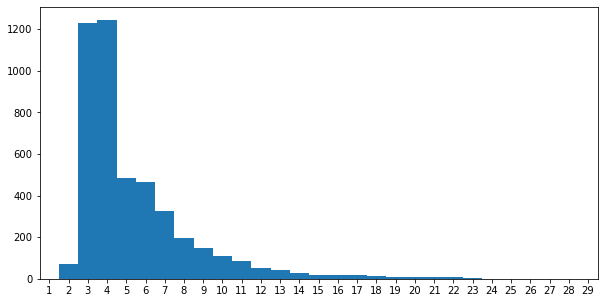

In [42]:
# with open('list_base_5.pkl', 'wb') as f:
#     pickle.dump(T, f)

with open('list_base_5.pkl', 'rb') as f:
    T = pickle.load(f)

bins = [b - 0.5 for b in range(1, 30)]

plt.figure(figsize=(10, 5))
plt.hist(T, bins=bins)
plt.xticks([b for b in range(1, 30)])
plt.xlim([0.5, 29.5])
plt.show()

In [43]:
T = []
for r in range(N):
    CV = [0 for u in range(N)]

    CV[r] = 1
    Q = deque([]); Q.append(r)
    while Q:
        u = Q.popleft()
        for v in G.successors(u):
            if not CV[v]:
                CV[v] = 1
                Q.append(v)
    V = [0 for u in range(N)]

    R = N
    for t in range(100):
        P = greedyAppNew(G, V, N, 15, R / 2)
        if sum([CV[p] for p in P]) > 0:
            V = [0 for u in range(N)]
            for p in P:
                if CV[p]:
                    add_visit(G, N, V, p)
            for u in range(N):
                if V[u] == sum([CV[p] for p in P]):
                    V[u] = 0
                else:
                    V[u] = 1
        for p in P:
            if not V[p] and not CV[p]:
                deactivate(G, V, p)

        R = sum([1 - V[u] for u in range(N)])

        if R == 1:
            for u in range(N):
                if not V[u]:
                    print(u, t + 1)
                    T.append(t + 1)
            break
        if t == 99:
            print(r, "*******************")
            T.append(100)
    

0 3
1 5
2 2
3 2
4 5
5 7
6 4
7 2
8 4
9 5
10 3
11 6
12 5
13 3
14 2
15 2
16 4
17 2
18 5
19 5
20 2
21 2
22 3
23 3
24 2
25 2
26 3
27 9
28 3
29 4
30 4
31 3
32 3
33 3
34 3
35 3
36 3
37 4
38 5
39 6
40 8
41 8
42 6
43 8
44 5
45 5
46 5
47 5
48 5
49 3
50 4
51 4
52 8
53 4
54 6
55 6
56 5
57 6
58 4
59 4
60 6
61 5
62 7
63 8
64 11
65 9
66 5
67 4
68 4
69 7
70 4
71 6
72 10
73 4
74 7
75 13
76 8
77 8
78 5
79 5
80 12
81 13
82 5
83 5
84 4
85 9
86 10
87 6
88 3
89 3
90 3
91 3
92 5
93 4
94 4
95 3
96 3
97 3
98 3
99 3
100 3
101 3
102 3
103 3
104 3
105 3
106 6
107 8
108 12
109 7
110 6
111 12
112 7
113 13
114 8
115 13
116 8
117 8
118 10
119 5
120 5
121 8
122 10
123 6
124 4
125 6
126 3
127 5
128 5
129 4
130 4
131 3
132 4
133 8
134 6
135 7
136 3
137 3
138 3
139 3
140 3
141 3
142 3
143 5
144 7
145 3
146 3
147 3
148 9
149 5
150 4
151 3
152 3
153 3
154 12
155 3
156 3
157 3
158 3
159 3
160 6
161 5
162 7
163 5
164 6
165 3
166 3
167 7
168 10
169 8
170 5
171 5
172 5
173 7
174 13
175 15
176 3
177 3
178 3
179 3
180 3
181 3
18

1314 3
1315 6
1316 4
1317 8
1318 9
1319 6
1320 6
1321 9
1322 15
1323 14
1324 7
1325 13
1326 6
1327 7
1328 7
1329 7
1330 12
1331 5
1332 5
1333 5
1334 11
1335 6
1336 7
1337 5
1338 5
1339 5
1340 5
1341 6
1342 6
1343 3
1344 3
1345 3
1346 4
1347 6
1348 3
1349 3
1350 3
1351 3
1352 3
1353 3
1354 3
1355 3
1356 3
1357 4
1358 6
1359 5
1360 5
1361 5
1362 7
1363 4
1364 9
1365 6
1366 5
1367 5
1368 8
1369 7
1370 7
1371 5
1372 5
1373 5
1374 5
1375 5
1376 5
1377 5
1378 5
1379 5
1380 5
1381 5
1382 5
1383 8
1384 10
1385 5
1386 5
1387 7
1388 5
1389 5
1390 6
1391 5
1392 7
1393 5
1394 10
1395 5
1396 8
1397 5
1398 6
1399 7
1400 10
1401 6
1402 9
1403 7
1404 9
1405 6
1406 6
1407 9
1408 7
1409 7
1410 7
1411 5
1412 7
1413 4
1414 6
1415 6
1416 5
1417 6
1418 5
1419 5
1420 5
1421 5
1422 5
1423 4
1424 4
1425 4
1426 4
1427 4
1428 4
1429 4
1430 4
1431 4
1432 4
1433 5
1434 4
1435 4
1436 7
1437 4
1438 4
1439 4
1440 4
1441 4
1442 6
1443 11
1444 8
1445 10
1446 4
1447 8
1448 6
1449 4
1450 4
1451 4
1452 4
1453 4
1454 4
145

2466 2
2467 7
2468 7
2469 11
2470 7
2471 7
2472 7
2473 7
2474 6
2475 6
2476 6
2477 10
2478 8
2479 7
2480 10
2481 6
2482 6
2483 6
2484 8
2485 6
2486 8
2487 6
2488 6
2489 8
2490 14
2491 7
2492 7
2493 7
2494 10
2495 4
2496 8
2497 12
2498 12
2499 7
2500 7
2501 7
2502 14
2503 11
2504 8
2505 8
2506 10
2507 10
2508 9
2509 13
2510 7
2511 7
2512 11
2513 7
2514 7
2515 7
2516 6
2517 6
2518 6
2519 4
2520 6
2521 6
2522 6
2523 10
2524 7
2525 11
2526 8
2527 7
2528 8
2529 3
2530 5
2531 5
2532 5
2533 5
2534 5
2535 5
2536 5
2537 5
2538 5
2539 9
2540 5
2541 7
2542 4
2543 7
2544 7
2545 4
2546 7
2547 13
2548 7
2549 6
2550 7
2551 7
2552 7
2553 8
2554 5
2555 10
2556 18
2557 8
2558 19
2559 15
2560 4
2561 11
2562 7
2563 5
2564 4
2565 4
2566 3
2567 6
2568 4
2569 10
2570 2
2571 5
2572 4
2573 4
2574 4
2575 4
2576 5
2577 4
2578 4
2579 8
2580 4
2581 3
2582 5
2583 4
2584 8
2585 4
2586 7
2587 6
2588 6
2589 8
2590 9
2591 12
2592 5
2593 5
2594 5
2595 10
2596 6
2597 5
2598 8
2599 5
2600 5
2601 5
2602 5
2603 7
2604 5
260

3619 4
3620 4
3621 11
3622 4
3623 6
3624 6
3625 4
3626 7
3627 5
3628 7
3629 5
3630 4
3631 8
3632 9
3633 9
3634 5
3635 9
3636 10
3637 6
3638 8
3639 6
3640 5
3641 5
3642 5
3643 5
3644 5
3645 5
3646 5
3647 5
3648 5
3649 5
3650 5
3651 6
3652 7
3653 7
3654 7
3655 9
3656 12
3657 8
3658 4
3659 5
3660 8
3661 5
3662 5
3663 8
3664 5
3665 3
3666 4
3667 4
3668 4
3669 4
3670 6
3671 8
3672 6
3673 7
3674 5
3675 3
3676 3
3677 3
3678 3
3679 9
3680 2
3681 6
3682 9
3683 4
3684 6
3685 7
3686 5
3687 8
3688 4
3689 6
3690 4
3691 7
3692 6
3693 4
3694 3
3695 4
3696 4
3697 6
3698 4
3699 4
3700 4
3701 4
3702 4
3703 6
3704 5
3705 12
3706 12
3707 5
3708 17
3709 9
3710 15
3711 14
3712 6
3713 8
3714 7
3715 8
3716 6
3717 3
3718 3
3719 3
3720 5
3721 5
3722 5
3723 8
3724 5
3725 3
3726 3
3727 3
3728 3
3729 3
3730 3
3731 3
3732 4
3733 4
3734 3
3735 3
3736 3
3737 4
3738 3
3739 5
3740 3
3741 3
3742 3
3743 3
3744 3
3745 7
3746 3
3747 6
3748 3
3749 8
3750 4
3751 4
3752 4
3753 4
3754 4
3755 6
3756 4
3757 5
3758 5
3759 5
3760 

In [44]:
print(max(T), sum(T) / N)

19 5.728003475993917


In [45]:
for i in range(N):
    if T[i] == 19:
        print(i)

2558


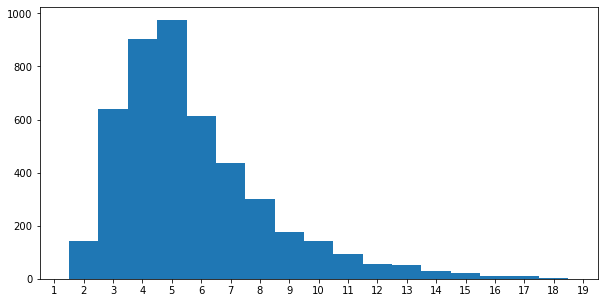

In [49]:
# with open('list_base_2.pkl', 'wb') as f:
#     pickle.dump(T, f)

with open('list_base_2.pkl', 'rb') as f:
    T = pickle.load(f)

bins = [b - 0.5 for b in range(1, 20)]

plt.figure(figsize=(10, 5))
plt.hist(T, bins=bins)
plt.xticks([b for b in range(1, 20)])
plt.xlim([0.5, 19.5])
plt.show()

In [50]:
T = []
for r in range(N):
    CV = [0 for u in range(N)]

    CV[r] = 1
    Q = deque([]); Q.append(r)
    while Q:
        u = Q.popleft()
        for v in G.successors(u):
            if not CV[v]:
                CV[v] = 1
                Q.append(v)
    V = [0 for u in range(N)]

    R = N
    for t in range(100):
        P = greedyAppNew(G, V, N, 20, R / 2)
        if sum([CV[p] for p in P]) > 0:
            V = [0 for u in range(N)]
            for p in P:
                if CV[p]:
                    add_visit(G, N, V, p)
            for u in range(N):
                if V[u] == sum([CV[p] for p in P]):
                    V[u] = 0
                else:
                    V[u] = 1
        for p in P:
            if not V[p] and not CV[p]:
                deactivate(G, V, p)

        R = sum([1 - V[u] for u in range(N)])

        if R == 1:
            for u in range(N):
                if not V[u]:
                    print(u, t + 1)
                    T.append(t + 1)
            break
        if t == 99:
            print(r, "*******************")
            T.append(100)
    

0 3
1 5
2 2
3 2
4 3
5 7
6 2
7 2
8 2
9 2
10 2
11 4
12 3
13 3
14 2
15 2
16 4
17 2
18 5
19 5
20 2
21 2
22 3
23 3
24 2
25 2
26 3
27 9
28 3
29 4
30 3
31 3
32 3
33 3
34 2
35 3
36 3
37 3
38 3
39 6
40 5
41 5
42 7
43 6
44 3
45 3
46 3
47 3
48 3
49 2
50 5
51 4
52 8
53 4
54 6
55 6
56 5
57 6
58 4
59 4
60 6
61 11
62 7
63 8
64 11
65 8
66 5
67 4
68 4
69 7
70 4
71 6
72 10
73 4
74 7
75 13
76 8
77 8
78 5
79 5
80 12
81 13
82 5
83 5
84 8
85 5
86 9
87 5
88 2
89 2
90 2
91 2
92 4
93 3
94 4
95 3
96 3
97 3
98 3
99 3
100 3
101 3
102 3
103 3
104 2
105 3
106 6
107 8
108 12
109 7
110 9
111 4
112 10
113 11
114 6
115 11
116 6
117 6
118 10
119 4
120 6
121 4
122 6
123 11
124 3
125 4
126 3
127 5
128 4
129 4
130 3
131 3
132 4
133 8
134 6
135 7
136 3
137 3
138 3
139 3
140 3
141 3
142 3
143 5
144 7
145 3
146 3
147 3
148 9
149 5
150 4
151 3
152 3
153 3
154 12
155 3
156 3
157 3
158 3
159 3
160 4
161 5
162 8
163 3
164 4
165 3
166 3
167 2
168 2
169 2
170 2
171 3
172 6
173 4
174 9
175 15
176 5
177 5
178 5
179 5
180 5
181 5
182 

1319 3
1320 6
1321 8
1322 14
1323 13
1324 6
1325 7
1326 12
1327 6
1328 6
1329 6
1330 6
1331 6
1332 6
1333 6
1334 6
1335 4
1336 4
1337 4
1338 4
1339 5
1340 5
1341 5
1342 5
1343 3
1344 3
1345 3
1346 4
1347 6
1348 3
1349 3
1350 3
1351 3
1352 3
1353 3
1354 3
1355 3
1356 3
1357 3
1358 3
1359 3
1360 5
1361 5
1362 8
1363 3
1364 9
1365 5
1366 4
1367 4
1368 7
1369 5
1370 5
1371 5
1372 5
1373 5
1374 5
1375 4
1376 4
1377 4
1378 4
1379 6
1380 5
1381 5
1382 5
1383 8
1384 10
1385 5
1386 5
1387 7
1388 5
1389 5
1390 6
1391 5
1392 6
1393 5
1394 9
1395 5
1396 5
1397 6
1398 6
1399 9
1400 12
1401 11
1402 8
1403 9
1404 8
1405 6
1406 7
1407 9
1408 7
1409 7
1410 7
1411 5
1412 7
1413 4
1414 6
1415 6
1416 5
1417 5
1418 4
1419 4
1420 4
1421 4
1422 4
1423 4
1424 4
1425 4
1426 4
1427 4
1428 4
1429 4
1430 4
1431 4
1432 4
1433 5
1434 4
1435 4
1436 7
1437 4
1438 4
1439 4
1440 4
1441 4
1442 6
1443 11
1444 8
1445 10
1446 4
1447 8
1448 6
1449 4
1450 4
1451 4
1452 4
1453 4
1454 4
1455 4
1456 4
1457 4
1458 7
1459 8
1460 

2474 6
2475 6
2476 6
2477 11
2478 8
2479 5
2480 8
2481 6
2482 6
2483 6
2484 8
2485 8
2486 11
2487 4
2488 7
2489 7
2490 12
2491 6
2492 10
2493 5
2494 5
2495 3
2496 8
2497 9
2498 8
2499 6
2500 10
2501 6
2502 10
2503 9
2504 6
2505 6
2506 8
2507 6
2508 6
2509 6
2510 5
2511 5
2512 10
2513 5
2514 5
2515 5
2516 5
2517 7
2518 7
2519 4
2520 7
2521 11
2522 8
2523 10
2524 12
2525 13
2526 10
2527 6
2528 6
2529 3
2530 5
2531 5
2532 5
2533 5
2534 5
2535 5
2536 5
2537 5
2538 5
2539 7
2540 5
2541 7
2542 4
2543 7
2544 7
2545 4
2546 6
2547 12
2548 7
2549 6
2550 6
2551 6
2552 6
2553 6
2554 5
2555 10
2556 17
2557 10
2558 18
2559 17
2560 3
2561 10
2562 10
2563 5
2564 3
2565 3
2566 12
2567 4
2568 4
2569 9
2570 2
2571 5
2572 4
2573 3
2574 3
2575 3
2576 4
2577 3
2578 3
2579 7
2580 4
2581 3
2582 3
2583 3
2584 3
2585 3
2586 4
2587 7
2588 3
2589 6
2590 3
2591 7
2592 3
2593 4
2594 4
2595 10
2596 9
2597 4
2598 7
2599 4
2600 4
2601 4
2602 4
2603 7
2604 5
2605 4
2606 4
2607 4
2608 4
2609 4
2610 7
2611 8
2612 4
2613 

3628 4
3629 4
3630 4
3631 6
3632 8
3633 7
3634 10
3635 9
3636 10
3637 6
3638 8
3639 6
3640 7
3641 9
3642 5
3643 5
3644 5
3645 5
3646 5
3647 5
3648 5
3649 5
3650 5
3651 9
3652 7
3653 7
3654 7
3655 9
3656 12
3657 8
3658 4
3659 5
3660 8
3661 5
3662 5
3663 8
3664 5
3665 3
3666 4
3667 4
3668 4
3669 4
3670 6
3671 8
3672 6
3673 7
3674 5
3675 3
3676 3
3677 3
3678 3
3679 9
3680 2
3681 3
3682 6
3683 6
3684 4
3685 4
3686 7
3687 3
3688 3
3689 6
3690 3
3691 6
3692 3
3693 3
3694 3
3695 4
3696 6
3697 3
3698 5
3699 5
3700 5
3701 5
3702 5
3703 7
3704 6
3705 7
3706 5
3707 4
3708 11
3709 6
3710 12
3711 12
3712 7
3713 9
3714 8
3715 4
3716 7
3717 10
3718 11
3719 5
3720 5
3721 5
3722 5
3723 8
3724 5
3725 3
3726 3
3727 3
3728 3
3729 3
3730 3
3731 3
3732 4
3733 4
3734 3
3735 3
3736 3
3737 4
3738 3
3739 5
3740 3
3741 3
3742 3
3743 3
3744 3
3745 7
3746 3
3747 4
3748 3
3749 8
3750 7
3751 4
3752 4
3753 4
3754 10
3755 6
3756 8
3757 5
3758 5
3759 5
3760 5
3761 7
3762 5
3763 5
3764 9
3765 10
3766 7
3767 5
3768 5
376

In [52]:
print(max(T), sum(T) / N)

19 5.290897240929828


In [53]:
for i in range(N):
    if T[i] == 19:
        print(i)

1916


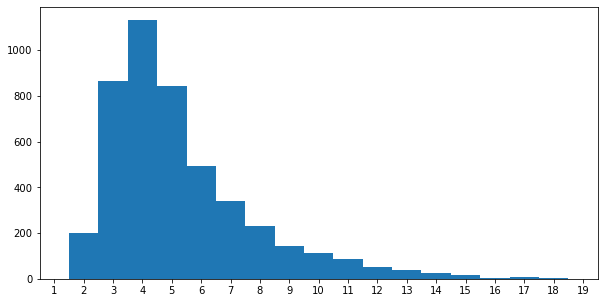

In [55]:
# with open('list_base_3.pkl', 'wb') as f:
#     pickle.dump(T, f)

with open('list_base_3.pkl', 'rb') as f:
    T = pickle.load(f)

bins = [b - 0.5 for b in range(1, 20)]

plt.figure(figsize=(10, 5))
plt.hist(T, bins=bins)
plt.xticks([b for b in range(1, 20)])
plt.xlim([0.5, 19.5])
plt.show()

In [61]:
path_pesos = 'data/pesos_tapas.csv'
pesos = pd.read_csv(path_pesos)
pesos.head()

G = nx.DiGraph()

S = set()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    S.add(origin)
    S.add(dest)

S = list(S)
id_ = {}; _id = {}; l = 0
for u in S:
    id_[u] = l; _id[l] = u
    l += 1

G = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    G.add_edge(id_[origin], id_[dest])
    
N = l

W = [0 for u in range(N)]

for u in range(N):
    if pesos[pesos['ID_tapa'] == _id[u]].shape[0] >= 1:  ## tomamos primera columna con el id, si no hay peso = 0
        W[u] = pesos[pesos['ID_tapa'] == _id[u]].iloc[0]['per_predio']

In [62]:
def get_size_weight(G, V_, N, u):
    
    V = V_.copy()
    
    s = 1; w = W[u];  V[u] = 1
    Q = deque([]); Q.append(u)
    while Q:
        u = Q.popleft()
        for v in G.predecessors(u):
            if not V[v]:
                s += 1; w += W[v]; V[v] = 1
                Q.append(v)
    
    return s, w

def greedyAppW(G, V_, N, K, limit, wlim):
    
    V = V_.copy()
    
    E = []
    for u in range(N):
        if not V[u]:
            E.append((get_size(G, V, N, u), u))

    S = set()
    for e in E:
        if e[0] > 0 and e[0] <= limit:
            S.add(e[1])

    ans = []
    count = 0
    while count < K:
        maxv = 0; u = -1
        for v in S:
            s, w = get_size_weight(G, V, N, v)
            if s > maxv and w <= wlim:
                u = v
                maxv = s
        if u == -1:
            break

        V, _ = visit(G, V, u)
        ans.append(u)
        S.remove(u)
        count += 1

    return ans

In [64]:
T = []
for r in range(N):
    CV = [0 for u in range(N)]

    CV[r] = 1
    Q = deque([]); Q.append(r)
    while Q:
        u = Q.popleft()
        for v in G.successors(u):
            if not CV[v]:
                CV[v] = 1
                Q.append(v)
    V = [0 for u in range(N)]

    R = N
    for t in range(100):
        P = greedyAppW(G, V, N, 10, R / 2, 5000)
        if sum([CV[p] for p in P]) > 0:
            V = [0 for u in range(N)]
            for p in P:
                if CV[p]:
                    add_visit(G, N, V, p)
            for u in range(N):
                if V[u] == sum([CV[p] for p in P]):
                    V[u] = 0
                else:
                    V[u] = 1
        for p in P:
            if not V[p] and not CV[p]:
                deactivate(G, V, p)

        R = sum([1 - V[u] for u in range(N)])

        if R == 1:
            for u in range(N):
                if not V[u]:
                    print(u, t + 1)
                    T.append(t + 1)
            break
        if t == 99:
            print(r, "*******************")
            T.append(100)
    

0 3
1 5
2 2
3 8
4 6
5 6
6 4
7 3
8 3
9 5
10 3
11 7
12 6
13 3
14 2
15 2
16 5
17 2
18 5
19 5
20 2
21 3
22 3
23 4
24 4
25 3
26 5
27 11
28 3
29 5
30 5
31 5
32 5
33 5
34 4
35 5
36 2
37 5
38 5
39 5
40 4
41 6
42 6
43 8
44 4
45 4
46 4
47 4
48 4
49 3
50 6
51 4
52 8
53 4
54 6
55 7
56 10
57 6
58 4
59 3
60 6
61 7
62 6
63 9
64 8
65 5
66 12
67 4
68 3
69 3
70 3
71 3
72 8
73 4
74 6
75 12
76 7
77 6
78 10
79 4
80 11
81 6
82 10
83 5
84 8
85 5
86 9
87 5
88 3
89 3
90 3
91 3
92 5
93 4
94 4
95 4
96 3
97 3
98 5
99 4
100 4
101 4
102 3
103 3
104 8
105 3
106 6
107 6
108 3
109 3
110 3
111 3
112 3
113 3
114 9
115 12
116 13
117 8
118 12
119 8
120 4
121 3
122 8
123 6
124 3
125 5
126 4
127 5
128 5
129 4
130 4
131 4
132 4
133 8
134 6
135 7
136 3
137 3
138 3
139 3
140 3
141 3
142 3
143 5
144 6
145 3
146 3
147 3
148 10
149 10
150 5
151 8
152 8
153 3
154 10
155 3
156 4
157 3
158 3
159 4
160 6
161 5
162 6
163 7
164 8
165 7
166 3
167 6
168 9
169 7
170 4
171 4
172 9
173 6
174 4
175 17
176 7
177 7
178 7
179 4
180 4
181 4
182 

1310 6
1311 8
1312 6
1313 6
1314 6
1315 6
1316 9
1317 7
1318 11
1319 8
1320 8
1321 8
1322 13
1323 12
1324 6
1325 12
1326 5
1327 6
1328 6
1329 6
1330 11
1331 4
1332 10
1333 16
1334 15
1335 5
1336 6
1337 4
1338 5
1339 5
1340 5
1341 5
1342 5
1343 4
1344 4
1345 4
1346 5
1347 7
1348 4
1349 4
1350 4
1351 5
1352 5
1353 5
1354 9
1355 7
1356 5
1357 5
1358 5
1359 6
1360 6
1361 6
1362 8
1363 5
1364 10
1365 5
1366 4
1367 4
1368 7
1369 5
1370 5
1371 9
1372 5
1373 7
1374 5
1375 5
1376 5
1377 5
1378 5
1379 5
1380 5
1381 5
1382 5
1383 8
1384 10
1385 5
1386 5
1387 7
1388 5
1389 5
1390 6
1391 5
1392 7
1393 5
1394 10
1395 5
1396 8
1397 5
1398 6
1399 7
1400 10
1401 9
1402 12
1403 10
1404 8
1405 5
1406 6
1407 8
1408 6
1409 10
1410 7
1411 5
1412 6
1413 4
1414 5
1415 5
1416 4
1417 5
1418 4
1419 4
1420 5
1421 5
1422 4
1423 7
1424 4
1425 4
1426 5
1427 4
1428 4
1429 4
1430 4
1431 4
1432 4
1433 5
1434 4
1435 4
1436 7
1437 5
1438 7
1439 6
1440 4
1441 4
1442 5
1443 9
1444 14
1445 11
1446 16
1447 14
1448 8
1449 4
1

2457 6
2458 6
2459 4
2460 3
2461 8
2462 7
2463 4
2464 7
2465 5
2466 4
2467 5
2468 5
2469 9
2470 5
2471 3
2472 7
2473 5
2474 5
2475 5
2476 5
2477 11
2478 9
2479 10
2480 7
2481 5
2482 10
2483 6
2484 5
2485 8
2486 11
2487 6
2488 6
2489 6
2490 11
2491 11
2492 8
2493 11
2494 10
2495 5
2496 8
2497 10
2498 10
2499 6
2500 6
2501 6
2502 12
2503 9
2504 6
2505 6
2506 8
2507 8
2508 7
2509 11
2510 9
2511 8
2512 8
2513 8
2514 10
2515 7
2516 5
2517 6
2518 6
2519 5
2520 6
2521 10
2522 7
2523 9
2524 11
2525 12
2526 9
2527 7
2528 5
2529 4
2530 5
2531 5
2532 7
2533 8
2534 5
2535 5
2536 5
2537 6
2538 5
2539 10
2540 7
2541 9
2542 4
2543 7
2544 5
2545 4
2546 9
2547 12
2548 6
2549 8
2550 8
2551 8
2552 8
2553 7
2554 7
2555 8
2556 16
2557 8
2558 17
2559 8
2560 2
2561 9
2562 9
2563 4
2564 2
2565 4
2566 9
2567 11
2568 2
2569 9
2570 3
2571 5
2572 7
2573 3
2574 3
2575 3
2576 4
2577 3
2578 8
2579 12
2580 4
2581 3
2582 3
2583 5
2584 8
2585 12
2586 10
2587 6
2588 7
2589 9
2590 8
2591 8
2592 5
2593 5
2594 5
2595 11
25

3607 6
3608 6
3609 6
3610 6
3611 6
3612 7
3613 8
3614 6
3615 4
3616 12
3617 8
3618 4
3619 4
3620 4
3621 11
3622 5
3623 7
3624 8
3625 6
3626 7
3627 7
3628 8
3629 6
3630 6
3631 10
3632 11
3633 11
3634 7
3635 11
3636 12
3637 8
3638 10
3639 8
3640 8
3641 7
3642 7
3643 7
3644 7
3645 10
3646 10
3647 11
3648 9
3649 7
3650 7
3651 12
3652 9
3653 10
3654 8
3655 10
3656 11
3657 7
3658 4
3659 6
3660 9
3661 6
3662 6
3663 9
3664 6
3665 3
3666 4
3667 6
3668 5
3669 5
3670 10
3671 7
3672 4
3673 12
3674 11
3675 14
3676 6
3677 16
3678 10
3679 14
3680 8
3681 12
3682 11
3683 9
3684 7
3685 6
3686 9
3687 5
3688 5
3689 7
3690 5
3691 8
3692 6
3693 5
3694 5
3695 6
3696 5
3697 7
3698 3
3699 3
3700 3
3701 3
3702 5
3703 7
3704 6
3705 16
3706 15
3707 5
3708 15
3709 8
3710 14
3711 13
3712 5
3713 7
3714 6
3715 7
3716 10
3717 13
3718 14
3719 8
3720 8
3721 8
3722 8
3723 11
3724 8
3725 6
3726 6
3727 6
3728 6
3729 6
3730 7
3731 7
3732 6
3733 6
3734 6
3735 6
3736 6
3737 6
3738 6
3739 8
3740 5
3741 9
3742 6
3743 9
3744 6
3

In [65]:
print(max(T), sum(T) / N)

20 6.245274820769064


In [66]:
for i in range(N):
    if T[i] == 20:
        print(i)

501
1911


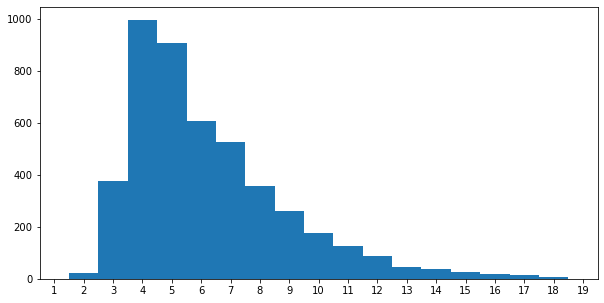

In [67]:
with open('list_base_w.pkl', 'wb') as f:
    pickle.dump(T, f)

# with open('list_base_w.pkl', 'rb') as f:
#     T = pickle.load(f)

bins = [b - 0.5 for b in range(1, 20)]

plt.figure(figsize=(10, 5))
plt.hist(T, bins=bins)
plt.xticks([b for b in range(1, 20)])
plt.xlim([0.5, 19.5])
plt.show()

In [80]:
path_pesos = 'data/pesos_tapas.csv'
pesos = pd.read_csv(path_pesos)
pesos.head()

,ID_tapa,per_predio
0,111663,7.781733
1,111664,52.549419
2,111665,70.218023
3,111666,6.945736
4,111667,42.931473


In [83]:
G = nx.DiGraph()

S = set()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    S.add(origin)
    S.add(dest)

S = list(S)
id_ = {}; _id = {}; l = 0
for u in S:
    id_[u] = l; _id[l] = u
    l += 1

G = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    G.add_edge(id_[origin], id_[dest])
for node in G.nodes:
    G.nodes[node]['weight'] = 0
    
N = l

for u in range(N):
    if pesos[pesos['ID_tapa'] == _id[u]].shape[0] >= 1:  ## tomamos primera columna con el id, si no hay peso = 0
        G.nodes[u]['weight'] = pesos[pesos['ID_tapa'] == _id[u]].iloc[0]['per_predio']

In [84]:
for u in range(N):
    print(G.nodes[u]['weight'])

36.66666666666666
60.12499999999999
55.03909090909091
46.66422287390028
37.783422459893046
64.89705882352939
29.345110771581354
38.892857142857146
35.074074074074076
27.306397306397304
34.70639730639731
54.0047846889952
35.66902356902356
26.84074074074075
32.392592592592585
11.612903225806454
21.96551724137931
29.441176470588232
78.92939876215739
34.84615384615384
51.75
50.08960573476703
24.438746438746442
40.70227920227921
57.93574660633486
52.69527714932129
46.339285714285715
27.0
35.269230769230774
53.877579365079356
61.98351254480286
16.23010752688172
19.209523809523805
31.705357142857146
54.73333333333334
47.43303571428571
63.90073529411767
56.41935483870968
46.56666666666666
56.262554305491975
39.861538461538466
13.670329670329672
75.2371428571429
34.796190476190475
48.80000000000002
40.53846153846154
37.97142857142858
28.277777777777768
45.518518518518526
37.84615384615385
46.448984348984354
56.86315789473682
44.6969696969697
57.26923076923079
42.159906759906775
38.4443701226309

14.557377049180328
32.18300653594771
5.8229508196721325
32.18300653594771
14.557377049180328
50.56872037914692
60.47142857142855
12.333333333333332
13.999999999999998
15.183574879227054
12.857142857142858
0
0
0
0
0
0
0
75.69836065573773
2.9114754098360662
0
14.557377049180328
0
139.75081967213129
0
0
0
0
87.34426229508202
9.850746268656716
45.440259740259755
11.523809523809526
7.090909090909091
12.982698961937716
32.835820895522396
11.714285714285715
0
2.495049504950495
0
0
0
29.09136047666335
4.968409539023933
1.923943661971831
40.402816901408464
3.8788480635551137
11.636544190665342
19.394240317775573
3.8788480635551137
42.66732869910624
0
17.454816285998014
23.27308838133068
0
1.9394240317775568
0
11.192034139402562
333.00000000000057
0
32.835820895522396
35.40000000000001
27.814285714285717
7.166666666666666
24.074449760765553
0
2.495049504950495
0
2.495049504950495
0
0
0
0
0
1.0845070422535212
0
0
8.947368421052632
0
0
17.465346534653467
0
4.99009900990099
33.05714285714286
20.342

18.08333333333333
21.7
6.2
12.576923076923075
20.358876003568245
14.523809523809526
14.909090909090908
19.926507454809343
20.23463687150838
11.321229050279328
8.799323728315201
9.176190476190476
14.0625
11.958333333333332
18.214285714285708
12.142857142857142
9.692307692307693
14.373626373626372
19.94505494505494
8.802197802197803
42.785714285714285
9.692307692307693
8.802197802197803
29.076923076923073
16.714285714285708
22.73076923076923
17.159340659340653
0
8.357142857142858
28.857142857142854
23.035714285714285
24.99630541871921
18.977542741234426
23.927601809954748
31.83968972204266
18.869824016563147
21.353823088455773
14.137931034482758
36.33695652173914
37.052473763118456
26.799635896337552
22.57266009852217
45.82142857142857
33.18440779610195
14.658170914542728
8.482758620689655
14.137931034482758
6.268375680580762
79.04228159922351
311.75178330441446
209.99647238726175
24.883116883116887
8.482758620689655
16.956112852664575
256.3217312481831
846.0356241184192
13.125
0
0
0
12.

In [105]:
def get_weight_size(G, N, u):
    
    V = [0 for u in range(N)]
    
    w = G.nodes[u]['weight']; s = 1;  V[u] = 1
    Q = deque([]); Q.append(u)
    while Q:
        u = Q.popleft()
        for v in G.predecessors(u):
            if not V[v]:
                w += G.nodes[v]['weight']; s += 1
                V[v] = 1; Q.append(v)
    
    return w, s

In [109]:
dd = {'id': [], 'ideal weight': [], 'ideal size': []}
for u in range(N):
    
    w, s = get_weight_size(G, N, u)
    
    dd['id'].append(_id[u])
    dd['ideal weight'].append(w)
    dd['ideal size'].append(s)
    print(_id[u], get_weight_size(G, N, u))
df = pd.DataFrame(data=dd)

16384 (65.0, 2)
16385 (290.89475383373696, 9)
16386 (55.03909090909091, 1)
16387 (3748.643202335243, 123)
16388 (3646.9398885522523, 121)
16389 (2780.645896462219, 95)
16390 (165.3248366013072, 5)
16391 (38.892857142857146, 1)
16392 (73.96693121693121, 2)
16393 (135.97972582972582, 4)
16394 (34.70639730639731, 1)
16395 (743.4366249307967, 24)
16396 (552.7996347280172, 18)
16397 (26.84074074074075, 1)
16398 (156.90000000000003, 3)
16399 (251.3285895003163, 7)
16400 (543.4199460185972, 14)
16401 (29.441176470588232, 1)
16402 (807.6570970859207, 19)
16403 (993.3404440358117, 24)
16404 (51.75, 1)
16405 (50.08960573476703, 1)
16406 (24.438746438746442, 1)
16407 (82.91025641025642, 3)
16408 (87.37692307692309, 2)
16409 (202.94488541142957, 5)
16410 (46.339285714285715, 1)
131097 (2455.1127462441837, 64)
131099 (842.9263278551514, 20)
16411 (274.5389297385621, 6)
16413 (134.63297491039427, 3)
16412 (16.23010752688172, 1)
16416 (19.209523809523805, 1)
16417 (50.914880952380955, 2)
16418 (54.73

1000428 (8980.654483660128, 230)
24137 (760.499376068376, 2)
139411 (122.22222222222223, 86)
16488 (17.142857142857142, 1)
24138 (122.26761904761902, 4)
139372 (7.0, 6)
147553 (10.08, 1)
24105 (57.008403361344534, 2)
24139 (141.45820942342678, 6)
24040 (562.6739130434781, 14)
132153 (40.67737468845195, 3)
132154 (11.09277208529493, 1)
139379 (3.0, 1)
24140 (303.22158730158725, 11)
148562 (4.4083508403361344, 1)
148563 (547.9595588235308, 2)
148564 (557.8584558823543, 3)
148565 (557.8584558823543, 4)
24141 (97.57942154463892, 5)
24142 (357.68825396825395, 12)
24143 (63.160110420979976, 3)
24031 (59.76492937051264, 1)
130494 (17.457142857142856, 1)
24144 (866.2179520976675, 29)
24041 (156.48666062619552, 4)
140473 (6.4324324324324325, 1)
140474 (32.16216216216216, 3)
140475 (25.72972972972973, 1)
140476 (45.02702702702703, 4)
140477 (54.67567567567568, 6)
140478 (0.0, 1)
140479 (14.969325153374234, 1)
140480 (3.7423312883435584, 1)
140481 (69.64500082904992, 8)
140482 (73.38733211739347,

141749 (1062.5075940927552, 42)
24196 (887.8322866790855, 5)
15152 (7.3672069825436415, 1)
24197 (23.50829170829171, 1)
24198 (584.5432830188679, 2)
24052 (80.96969696969697, 2)
150040 (122.22222222222223, 87)
117273 (595.6808679996212, 61)
117274 (0, 1)
1002014 (101.08494337108596, 12)
1002017 (136.3254497001999, 16)
141866 (32.37045666356011, 2)
141867 (16.113699906803355, 1)
141868 (18.966216216216214, 1)
141869 (70.30288909599254, 4)
141870 (56.70110671015844, 2)
141871 (161.63237418452937, 7)
141872 (27.86891891891892, 1)
141873 (167.65433364398885, 8)
141874 (213.9678471575024, 10)
141875 (27.094594594594604, 1)
141876 (285.2667753960858, 13)
141877 (341.7802889095992, 15)
141878 (29.804054054054056, 1)
141879 (29.804054054054056, 1)
141880 (18.493598862019912, 1)
141881 (121.46433675054362, 3)
141882 (51.303883193538354, 2)
141883 (12.994780987884436, 1)
1002086 (0, 1)
24053 (87.44685990338162, 3)
15191 (270.1542289879315, 9)
24088 (1135.6507307513216, 32)
24095 (377.27166373694

13149 (215.8354259434995, 10)
13150 (20.38834951456311, 1)
13151 (20.38834951456311, 1)
13152 (278.26669829914596, 12)
13153 (565.4045226334445, 27)
13154 (0, 1)
13155 (555.772943686076, 26)
13156 (31.750000000000004, 1)
13157 (274.10818713450294, 12)
13158 (21.166666666666668, 1)
13159 (205.7733918128655, 10)
13160 (28.22222222222223, 1)
13161 (164.70906432748538, 8)
13162 (116.58918128654972, 6)
13163 (71.9970760233918, 4)
13164 (2420.050662813215, 22)
13165 (2412.5083315248717, 19)
13166 (2268.973362199718, 16)
13167 (2121.811399009534, 13)
13168 (1963.2494358193503, 10)
13169 (618.6584558823542, 7)
13170 (43.395588235294106, 1)
13171 (495.07499999999874, 3)
13172 (698.9132352941166, 5)
13173 (1448.5819852941183, 7)
13174 (4084.6810056486843, 25)
147530 (110.23670588235296, 20)
147529 (112.75670588235295, 21)
13177 (1911.9290846602041, 13)
147531 (2.52, 1)
13178 (1473.0581888317397, 7)
13179 (844.7211739034638, 5)
13181 (192.6105360417795, 1)
13182 (72.44016685385343, 9)
13183 (94.4

13594 (30683.688499786982, 2139)
13596 (30696.671198748918, 2141)
13597 (30939.453897710857, 2155)
121563 (164.5395812562313, 4)
13595 (30696.671198748918, 2140)
13600 (31099.32889771086, 2166)
13601 (31173.287231044193, 2171)
13602 (31258.739611996574, 2176)
121564 (164.5395812562313, 5)
13603 (31345.26639771086, 2180)
13605 (31575.231675488634, 2190)
13606 (31657.703897710857, 2193)
13599 (31035.203897710857, 2161)
121565 (164.5395812562313, 6)
13608 (31724.49723104419, 2201)
13604 (31388.717786599747, 2182)
15731 (435.1691638719741, 16)
13609 (39665.72812639216, 2509)
121566 (191.16331006979058, 7)
13614 (23.417763157894743, 2)
13610 (39680.528126392164, 2510)
15732 (23.566666666666666, 1)
13616 (105.78181818181818, 7)
121567 (191.16331006979058, 8)
13617 (41.59090909090909, 4)
13620 (41.817434210526315, 3)
13618 (401.4473684210509, 2)
13619 (42.19377162629758, 3)
13623 (4068.761081288469, 94)
121568 (191.16331006979058, 9)
13622 (115.00965271786023, 8)
13626 (4.840042750267189, 2)


13936 (61731.84050945554, 3204)
13937 (61747.67384278887, 3205)
13938 (62724.10360497144, 3232)
13939 (62740.8024686078, 3233)
13940 (63276.09711673373, 3251)
13941 (63279.3683031744, 3252)
13942 (64152.4298846108, 3288)
13943 (64166.61230219323, 3289)
13944 (64170.515527999676, 3290)
13945 (64199.15235664419, 3291)
13946 (64226.77032373715, 3292)
13947 (64260.456758861656, 3293)
13948 (9760.254378419022, 295)
13949 (9770.004378419022, 296)
13950 (9779.754378419022, 297)
13951 (72786.1458626517, 3559)
13952 (72786.1458626517, 3560)
13953 (371.515618173875, 12)
13954 (1766.2969474508907, 23)
13955 (67.74242424242425, 1)
121633 (275.41857291765376, 29)
13957 (1005.2036589966053, 15)
13958 (1307.2427540647457, 21)
13959 (19.924242424242426, 1)
13960 (51.803030303030305, 2)
13961 (121.95687645687647, 5)
13962 (52.61538461538463, 2)
13963 (139.48249619482496, 3)
13964 (7.945205479452055, 1)
13965 (1.9394240317775568, 1)
13966 (0, 1)
13967 (218.94240317775558, 6)
13968 (184.2452830188678, 3)

14275 (8.0, 3)
14276 (5.0, 2)
14277 (4.0, 4)
14278 (13.0, 8)
14279 (15.0, 9)
14280 (18.0, 10)
14281 (3.0, 2)
14282 (4.0, 3)
14283 (46.707042253521124, 21)
14284 (19.23943661971831, 4)
14285 (13.467605633802817, 3)
14286 (11.543661971830986, 2)
14287 (5.771830985915493, 1)
14288 (5.771830985915493, 1)
14289 (13.467605633802817, 3)
24080 (11.523809523809526, 3)
14291 (19.23943661971831, 5)
14292 (25.011267605633805, 6)
14293 (28.859154929577464, 7)
14294 (34.63098591549296, 11)
14295 (36.55492957746479, 12)
14296 (40.40281690140845, 13)
14297 (42.32676056338028, 14)
14298 (38.338555470755566, 3)
14299 (34.4906681468119, 2)
15867 (25.21251241310824, 1)
14300 (1.9450261780104712, 1)
14301 (0, 1)
14303 (164.3486481847051, 11)
14304 (156.57460732984285, 7)
14305 (156.57460732984285, 6)
14302 (149.7670157068062, 3)
14307 (5.835078534031414, 2)
14306 (147.82198952879574, 2)
14309 (2.917539267015707, 1)
14310 (1097.2341374413163, 227)
14311 (588.0794962266, 12)
14312 (520.4128295599334, 11)
143

14768 (4511.848984981774, 571)
14769 (4511.848984981774, 572)
14770 (4512.482775719339, 573)
14771 (4512.482775719339, 574)
14772 (4512.482775719339, 575)
14773 (4512.482775719339, 576)
14774 (4512.482775719339, 577)
14775 (4512.482775719339, 578)
14776 (4710.225485839404, 579)
14777 (4511.848984981774, 568)
14778 (4710.225485839404, 580)
14779 (52.68333333333327, 2)
14780 (4762.908819172737, 584)
14781 (52.68333333333327, 3)
14782 (4762.908819172737, 585)
14783 (52.68333333333327, 1)
14784 (4764.176400647866, 586)
14785 (36.909090909090914, 2)
14786 (5.2727272727272725, 1)
14787 (22.452830188679247, 1)
14788 (71.45555555555545, 3)
14789 (69.63888888888879, 2)
14790 (68.42777777777768, 1)
14791 (6908.3813669756955, 750)
14792 (6908.3813669756955, 749)
14793 (6906.9698956540005, 748)
14794 (2125.0551692938375, 155)
14795 (252.23469458791965, 127)
14796 (252.23469458791965, 128)
14797 (252.23469458791965, 129)
14798 (252.23469458791965, 130)
14799 (252.23469458791965, 131)
14800 (443.449

15060 (2834.10172779146, 380)
15061 (24.4558261521169, 6)
15062 (47.926414387411015, 11)
24021 (712.3767277919817, 6)
15064 (3966.146925517963, 455)
15065 (22.336134453781508, 1)
15066 (122.18573930813018, 4)
15067 (42.0, 2)
15068 (58.575, 6)
121560 (136.0, 1)
15070 (61.761111111111134, 2)
15071 (135.86111111111111, 5)
15072 (91.91111111111113, 4)
15073 (175.13253968253971, 8)
15074 (228.52063492063493, 12)
15075 (274.8599206349207, 16)
15076 (20.1, 1)
15077 (29.845238095238106, 1)
15078 (37.78928571428571, 3)
15079 (5.2, 1)
15080 (22.075, 2)
15081 (357.65992063492075, 20)
15082 (3.0, 1)
15083 (446.9992063492065, 28)
15084 (11044.701868444958, 1007)
15085 (12839.570709024672, 1114)
15086 (16.0, 2)
15087 (79.89142857142858, 7)
15088 (169.0497619047619, 14)
15089 (61.77857142857144, 4)
15090 (14.35, 2)
15091 (5.35, 1)
15092 (39.14285714285715, 1)
15093 (13015.616899500861, 1127)
15094 (206.0854761904762, 15)
15095 (27714.053269172477, 1949)
15096 (27714.053269172477, 1950)
15097 (13015.6

15429 (1247.948083778966, 48)
121924 (3012.3679188748783, 89)
15431 (1461.1198772331898, 61)
15432 (160.2441293451019, 9)
15433 (77.43796992481201, 6)
15434 (1981.6228251392968, 135)
15435 (1974.7299679964397, 134)
15436 (45.25, 3)
15437 (33.39160401002506, 3)
15438 (64.03320802005011, 5)
15439 (6.201754385964912, 1)
15440 (23.955377574370708, 2)
15441 (34.26455631833206, 3)
15442 (18.618421052631575, 2)
15443 (7.583333333333332, 1)
15444 (5.5, 1)
15445 (19.035087719298247, 2)
15446 (33.35453216374269, 3)
15447 (27.249999999999996, 2)
15448 (1901.1585394250108, 130)
15449 (1930.3557248283819, 134)
15450 (50.421428571428564, 3)
15451 (15385.319835925993, 415)
15452 (15695.696310165595, 420)
15453 (15125.88308274158, 404)
15454 (27.222672064777328, 1)
15455 (15128.605304963803, 405)
15456 (15161.455879676445, 406)
15457 (17651.11698458292, 459)
15458 (1066.6847915687806, 24)
15459 (1047.105556596103, 23)
15460 (749.7406073377111, 21)
15461 (1247.186735836605, 49)
15462 (918.4055108583211

15834 (22.719723183391004, 1)
15835 (29.965397923875432, 1)
15836 (16.22837370242215, 1)
15837 (58.422145328719736, 2)
15838 (32.456747404844286, 1)
15839 (51.93079584775089, 1)
15840 (35.702422145328725, 1)
15841 (25.965397923875432, 1)
15842 (21.74506578947368, 1)
15843 (40.14473684210526, 2)
15844 (1.6726973684210529, 1)
24037 (10080.998873352677, 314)
15845 (5.018092105263158, 2)
15847 (38.0655737704918, 2)
15848 (16.918032786885245, 1)
15849 (8.363486842105264, 1)
15850 (20.072368421052634, 2)
15851 (331.19407894736713, 1)
15852 (11.70888157894737, 1)
15853 (13.381578947368427, 1)
15846 (15.054276315789474, 3)
15854 (310.8829896362769, 20)
15856 (12.982698961937716, 1)
15857 (74.65051903114188, 5)
15858 (16.22837370242215, 1)
15859 (19.474048442906575, 1)
15860 (120.08996539792388, 7)
15855 (12.982698961937716, 1)
15862 (17.454816285998014, 1)
15863 (713.0391323237309, 12)
15864 (18.5759682224429, 1)
15865 (18.5759682224429, 1)
14551 (49.41666666666666, 1)
15866 (32.70348187686196

16322 (36.3409090909091, 1)
16323 (53.113636363636374, 2)
16324 (61.500000000000014, 3)
16325 (86.61363636363637, 7)
16326 (970.7396457193328, 52)
16327 (1128.5708103257089, 70)
16328 (50.679245283018865, 7)
16329 (8.943396226415091, 1)
16330 (11.924528301886792, 1)
16331 (32.79245283018868, 5)
16332 (14.905660377358489, 3)
16333 (5.962264150943396, 1)
16334 (5.962264150943396, 1)
16335 (19.44444444444445, 1)
16336 (11.533333333333333, 1)
16337 (46.55555555555556, 3)
16338 (16.325, 1)
16339 (0, 1)
16340 (6.1, 1)
16341 (1142.6106606835488, 77)
16342 (1161.5606606835486, 79)
16343 (1217.2939940168822, 84)
16344 (1222.8495495724376, 85)
16345 (1264.7606606835488, 89)
16346 (19.56818181818182, 2)
16347 (11.181818181818182, 1)
16348 (5.5, 1)
16349 (46.02413793103448, 3)
16350 (41.99439775910364, 1)
16351 (34.045138888888886, 1)
16352 (47.6111111111111, 1)
16353 (14.933333333333335, 1)
16354 (1582.3315553622424, 52)
16355 (1851.4642457463758, 64)
16356 (26.000000000000004, 1)
16357 (1528.439

In [110]:
df.to_csv('ideal_weight.csv', index=False)